In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
pwd

u'/home/younguj/repo/abaqusPy/examples/one'

In [9]:
ls *.txt

diagnose.txt                          OneElement_00_UMAT_mises_MatF_None.txt
OneElement_00_UMAT_epl_MatF_None.txt  statev.txt


In [10]:
!head -n 3 OneElement_00_UMAT_mises_MatF_None.txt

  0.00000e+00   0.00000e+00   0.00000e+00   0.00000e+00   0.00000e+00   0.00000e+00   0.00000e+00
  1.00000e-05   2.30769e+06   0.00000e+00   0.00000e+00   1.00000e-02   1.00000e-05  -4.28571e-06
  2.00000e-05   4.61538e+06   0.00000e+00   0.00000e+00   2.00000e-02   2.00000e-05  -8.57143e-06


In [11]:
dat=np.loadtxt('OneElement_00_UMAT_mises_MatF_None.txt').T

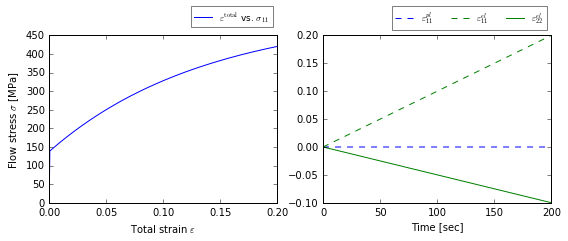

In [16]:
fig=plt.figure(figsize=(9,3.0));
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
mpa=1e6

#   0,  1,   2,   3,   4,   5,   6
# e11,s11,pe11,pe22,time,ee11,ee22

ax1.plot(dat[0],dat[1]/mpa,'-',label=r'$\varepsilon^\mathrm{total}$ vs. $\sigma_{11}$')
#ax2.plot(dat[4],dat[0],'-',label=r'$\varepsilon_{11}$')
ax2.plot(dat[4],dat[2],'--',label=r'$\varepsilon_{11}^{pl}$')
ax2.plot(dat[4],dat[5],'g--',label=r'$\varepsilon_{11}^{el}$')
ax2.plot(dat[4],dat[6],'-',label=r'$\varepsilon_{22}^{el}$')
#ax1.plot(dat[2],dat[1]/mpa,'x-',label=r'$\varepsilon^\mathrm{plastic}$ vs. $\sigma_{11}$')

ax1.set_ylabel(r'Flow stress $\sigma$ [MPa]')
ax1.set_xlabel(r'Total strain $\varepsilon$')
ax2.set_xlabel('Time [sec]')

ax1.legend(framealpha=0.5,fontsize=9,numpoints=1,bbox_to_anchor=(1.0,1.2),ncol=4)
ax2.legend(framealpha=0.5,fontsize=9,numpoints=1,bbox_to_anchor=(1.0,1.2),ncol=4)